In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import warnings
from src.category_classification.helper_methods import preprocess_data

from src.category_classification.train import BinarySeismicEventTrainer

warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
DATA_CSV_PATH = "../data/raw/seismic_data_binary.csv"

df = pd.read_csv(DATA_CSV_PATH)

X, y = preprocess_data(df)

Handling missing values...

Final dataset shape: (17135, 6)
Features used: ['mag', 'depth', 'nst', 'gap', 'longitude', 'latitude']
Number of samples: 17135


For testing streamlit application

In [4]:
display(df[df['target'] == 1].head(1))
display(df[df['target'] == 0].head(5))

X, y = preprocess_data(df)

display(X[X['longitude'] == -105.2792].head(1))

,target,mag,depth,nst,gap,longitude,latitude,id
2,1,2.91,10.0,6.0,317.0,-67.2968,19.2451,pr2019273033


,target,mag,depth,nst,gap,longitude,latitude,id
0,0,3.1,0.000,NaN,33.0,-105.279200,43.782800,usc000tk6r
1,0,2.7,0.000,10.0,118.0,-105.348200,43.784100,us6000j9s0
3,0,3.2,0.000,30.0,70.6,-105.194000,43.805000,rusms00004827
11,0,3.2,0.995,11.0,81.0,-122.799667,46.739167,uw10560328
13,0,3.0,0.212,14.0,140.0,-122.793000,46.758000,uw10522773


Handling missing values...

Final dataset shape: (17135, 6)
Features used: ['mag', 'depth', 'nst', 'gap', 'longitude', 'latitude']
Number of samples: 17135


,mag,depth,nst,gap,longitude,latitude
0,3.1,0.0,17.0,33.0,-105.2792,43.7828


In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: create validation set from training data (20% of training data)
# This results in: 64% train, 16% validation, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100)
trainer = BinarySeismicEventTrainer(model, model_name="earthquake_classifier_v1", scaler=scaler)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (10966, 6)
Test data shape: (3427, 6)
Validation data shape: (2742, 6)


In [6]:
trainer.train(X_train, y_train, X_val, y_val)


model_path, scaler_path = trainer.save_model("models")


TRAINING BINARY SEISMIC EVENT CLASSIFIER

Training samples: 10966
Class distribution:
  Class 0 (non-earthquake): 4566 (41.6%)
  Class 1 (earthquake):     6400 (58.4%)

Applying StandardScaler...

Training model...

Training completed!
Training Accuracy:  1.0000
Training Precision: 1.0000
Training Recall:    1.0000
Training F1-Score:  1.0000

Validation Accuracy:  0.9931
Validation Precision: 0.9925
Validation Recall:    0.9956
Validation F1-Score:  0.9941

Model saved to: models/earthquake_classifier_v1.joblib
Scaler saved to: models/earthquake_classifier_v1_scaler.joblib


In [7]:
trainer.evaluate(X_test, y_test)


EVALUATING BINARY CLASSIFIER

Making predictions...

TEST SET METRICS
Accuracy:  0.9956
Precision: 0.9965 (of predicted earthquakes, how many are correct)
Recall:    0.9960 (of actual earthquakes, how many detected)
F1-Score:  0.9962
AUC-ROC:   0.9993
MCC:       0.9910 (Matthews Correlation Coefficient)

DETAILED CLASSIFICATION REPORT
                    precision    recall  f1-score   support

Non-Earthquake (0)       0.99      1.00      0.99      1427
    Earthquake (1)       1.00      1.00      1.00      2000

          accuracy                           1.00      3427
         macro avg       1.00      1.00      1.00      3427
      weighted avg       1.00      1.00      1.00      3427


CONFUSION MATRIX BREAKDOWN
True Negatives (TN):  1,420 (correctly identified non-earthquakes)
False Positives (FP): 7 (non-earthquakes misclassified as earthquakes)
False Negatives (FN): 8 (earthquakes missed)
True Positives (TP):  1,992 (correctly identified earthquakes)


{'accuracy': 0.9956229938721914,
 'precision': 0.9964982491245623,
 'recall': 0.996,
 'f1_score': 0.9962490622655664,
 'auc_roc': 0.999332515767344,
 'mcc': 0.9909953011715023,
 'y_pred': array([0, 1, 0, ..., 1, 0, 1], shape=(3427,)),
 'y_pred_proba': array([0., 1., 0., ..., 1., 0., 1.], shape=(3427,)),
 'y_test': 3255     0
 5752     1
 5368     0
 3825     1
 5219     1
         ..
 16919    0
 7553     0
 2630     1
 2364     0
 1530     1
 Name: target, Length: 3427, dtype: int64}

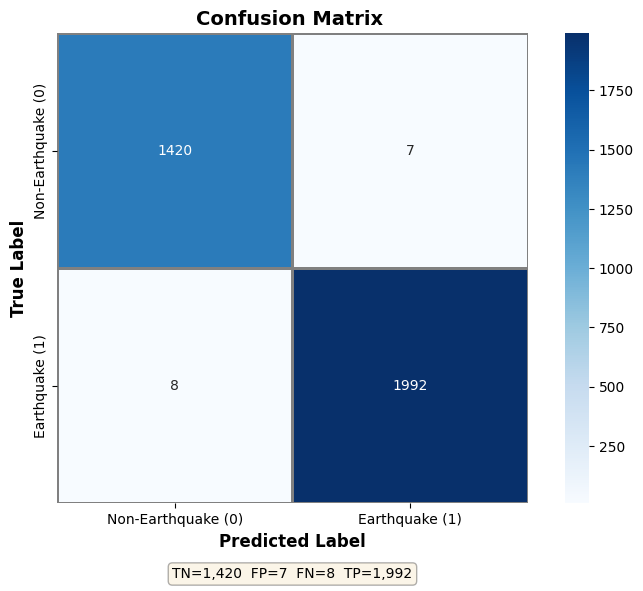

In [8]:
trainer.plot_confusion_matrix(X_test, y_test)

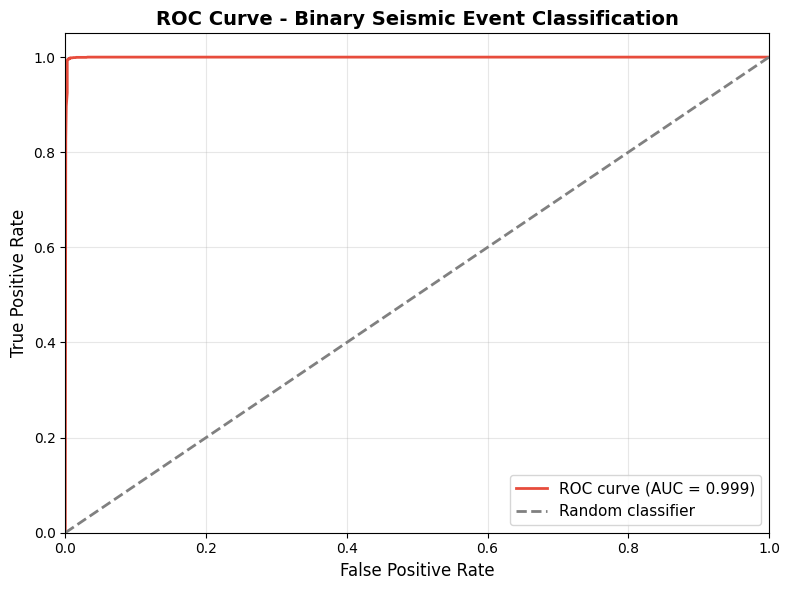

In [9]:
trainer.plot_roc_curve(X_test, y_test)

In [10]:
display(trainer.get_feature_importance(["mag", "depth", "nst", "gap", "longitude", "latitude"]))

,feature,importance
1,depth,0.470913
4,longitude,0.259744
5,latitude,0.123185
0,mag,0.108679
2,nst,0.019905
3,gap,0.017575
